# PROJECT 3 PROPOSAL LEVEL-2
# Idea: Fraud Detection

# Data Loading and Cleaning

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [2]:
data = pd.DataFrame(pd.read_csv("creditcard.csv"))
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.shape

(284807, 31)

In [4]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
data.isnull().sum()*100/data.shape[0]

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

# Anomaly Detection

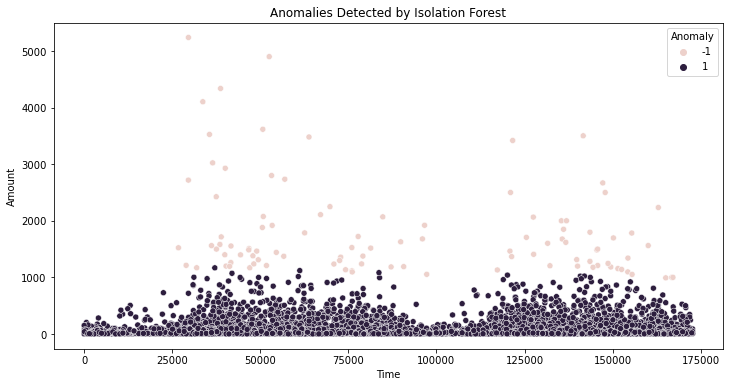

In [8]:

from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.utils import shuffle


# Select numerical features
numerical_features = data[['Time', 'Amount']]

# Reduce dimensionality using PCA
pca = PCA(n_components=min(len(numerical_features.columns), 10))  # Adjust the number of components
numerical_features_pca = pca.fit_transform(numerical_features)

# Shuffle and sample data
numerical_features_pca = shuffle(numerical_features_pca, random_state=42)
sample_size = 10000  # Adjust sample size as needed
numerical_features_sample = numerical_features_pca[:sample_size]

# Anomaly Detection Methods on sampled data
iso_forest = IsolationForest(contamination=0.01, random_state=42)
iso_forest.fit(numerical_features_sample)
iso_forest_preds = iso_forest.predict(numerical_features_sample)

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
lof_preds = lof.fit_predict(numerical_features_sample)

ocsvm = OneClassSVM(nu=0.01)
ocsvm_preds = ocsvm.fit_predict(numerical_features_sample)

# Assign predictions to the sampled subset of the DataFrame
data_sample = data.sample(n=sample_size, random_state=42)
data_sample['IsolationForest'] = iso_forest_preds
data_sample['LOF'] = lof_preds
data_sample['OneClassSVM'] = ocsvm_preds

# Visualize the anomalies detected in the sampled subset
plt.figure(figsize=(12, 6))
plt.title("Anomalies Detected by Isolation Forest")
sns.scatterplot(data=data_sample, x='Time', y='Amount', hue='IsolationForest')
plt.xlabel("Time")
plt.ylabel("Amount")
plt.legend(title='Anomaly')
plt.show()


# Machine Learning Models

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Data Preprocessing
# Assuming all features are numeric except for the 'Class' column
X = data.drop('Class', axis=1)  # Features
y = data['Class']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (optional but recommended for some models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)

# Neural Network
nn_model = MLPClassifier()
nn_model.fit(X_train_scaled, y_train)

# Model Evaluation
# Logistic Regression
lr_pred = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_pred))

# Decision Tree
dt_pred = dt_model.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("\nDecision Tree Accuracy:", dt_accuracy)
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_pred))

# Neural Network
nn_pred = nn_model.predict(X_test_scaled)
nn_accuracy = accuracy_score(y_test, nn_pred)
print("\nNeural Network Accuracy:", nn_accuracy)
print("Neural Network Classification Report:")
print(classification_report(y_test, nn_pred))


Logistic Regression Accuracy: 0.9991222218320986
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962


Decision Tree Accuracy: 0.9992275552122467
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.75      0.83      0.79        98

    accuracy                           1.00     56962
   macro avg       0.87      0.91      0.89     56962
weighted avg       1.00      1.00      1.00     56962


Neural Network Accuracy: 0.9994908886626171
Neural Network Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00  

# Feature Engineering

In [10]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Remove irrelevant features
data.drop(['Time'], axis=1, inplace=True)

# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('Class', axis=1))
data_scaled = pd.DataFrame(scaled_features, columns=data.columns[:-1])

# Dimensionality Reduction using PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
pca_features = pca.fit_transform(data_scaled)
data_pca = pd.DataFrame(pca_features, columns=[f"PC{i+1}" for i in range(pca.n_components_)])

# Concatenate PCA features with the target variable
data_final = pd.concat([data_pca, data['Class']], axis=1)

# Check the final dataset after feature engineering
print(data_final.head())


        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.323706 -0.506010 -0.228982 -0.341824  0.053475  0.019935  0.133313   
1 -0.472416 -0.231634  0.474439  0.754755  0.261153 -0.116552  0.206521   
2  1.774979 -0.564796 -0.105515 -0.095422 -2.089531 -1.198401 -0.460345   
3  0.245283  0.053440  1.055409  0.229120 -0.502606 -1.273791  0.332796   
4 -0.065876  0.284442 -0.437190 -0.604129 -0.629113  0.132225  0.874439   

        PC8       PC9      PC10  ...      PC19      PC20      PC21      PC22  \
0  0.662644  0.041314  0.245528  ...  0.904200  0.477596  0.016015  0.501352   
1 -0.546761  0.663043 -0.757946  ... -0.158480  0.663936 -0.090997  0.459860   
2  0.383679  0.981489  1.064936  ...  1.024336 -2.833810 -1.343360  0.952730   
3  0.457382 -1.023091  2.129148  ...  0.074997 -1.136438 -1.552256  0.171788   
4  0.613619 -0.599161 -0.147078  ...  0.406006 -0.038322  0.033220 -0.082221   

       PC23      PC24      PC25      PC26      PC27  Class  
0  0.76

# 

# Deploying a Machine Learning Model for Real-time Fraud Detection

In [11]:
from sklearn.ensemble import RandomForestClassifier
import joblib

# Initialize and train a RandomForestClassifier model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Save the trained model to a file
joblib.dump(rf_model, 'fraud_detection_model.pkl')


['fraud_detection_model.pkl']